## CS156 Assignment 1 


Erin Doolittle

Spring 2020

### Moore's Law

In [35]:
import pandas as pd
from datetime import datetime
from dateutil.parser import parse
import matplotlib.pyplot as plt
import math

In [3]:
#import data and create dataframe
bms = pd.read_csv("benchmarks.txt", 
                  dtype = {"testID":str, "benchname":str, 'base':float, 'peak':float},
                  na_values = ['--'])

In [4]:
#check that data is correct
print(bms.head())

#filter for specific benchmark test
sbms = bms.loc[bms.benchName == '130.li']
sbms['index'] = range(0, len(sbms.testID))
print(sbms.head())


                 testID    benchName   base   peak
0  cpu95-19990104-03254  101.tomcatv  19.40  27.10
1  cpu95-19990104-03254     102.swim  27.20  34.80
2  cpu95-19990104-03254   103.su2cor  10.10   9.98
3  cpu95-19990104-03254  104.hydro2d   8.58   8.61
4  cpu95-19990104-03254    107.mgrid   8.94   9.44
                   testID benchName  base  peak  index
14   cpu95-19990104-03256    130.li  19.7  19.7      0
22   cpu95-19990118-03257    130.li  19.8  19.8      1
40   cpu95-19990122-03268    130.li  11.8  18.2      2
128  cpu95-19990201-03391    130.li  20.6  26.8      3
136  cpu95-19990201-03394    130.li  11.8  16.7      4


C:\Users\tigge\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [5]:
#convert the testIDs to dates
dates = []
for n in sbms.testID:
    m = n.split('-')
    if len(m) > 1:
        dates.append(parse(m[1]))
    else:
        dates.append(0)
sbms['dates'] = dates
sbms2 = sbms.loc[sbms.dates != 0]

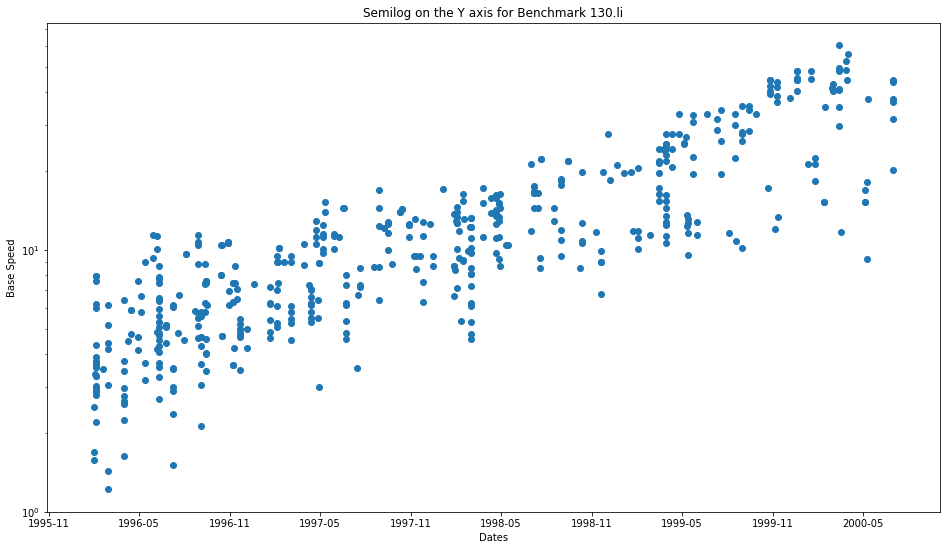

In [34]:
#initial plot of the benchmark tests
plt.figure(figsize = (16,9))
plt.scatter(sbms2.dates,sbms2.base)
plt.xlabel("Dates")
plt.ylabel("Base Speed") 
plt.yscale('log')
plt.title("Semilog on the Y axis for Benchmark 130.li")     
plt.show()

In [76]:
#transform data to be used in a linear model
linbase = []
for i in sbms2.base:
    linbase.append(math.log(i, 2))

lindate = pd.to_datetime(sbms2.dates)
ldates = np.asarray(lindate.apply(lambda x: x.timestamp()).astype(int))

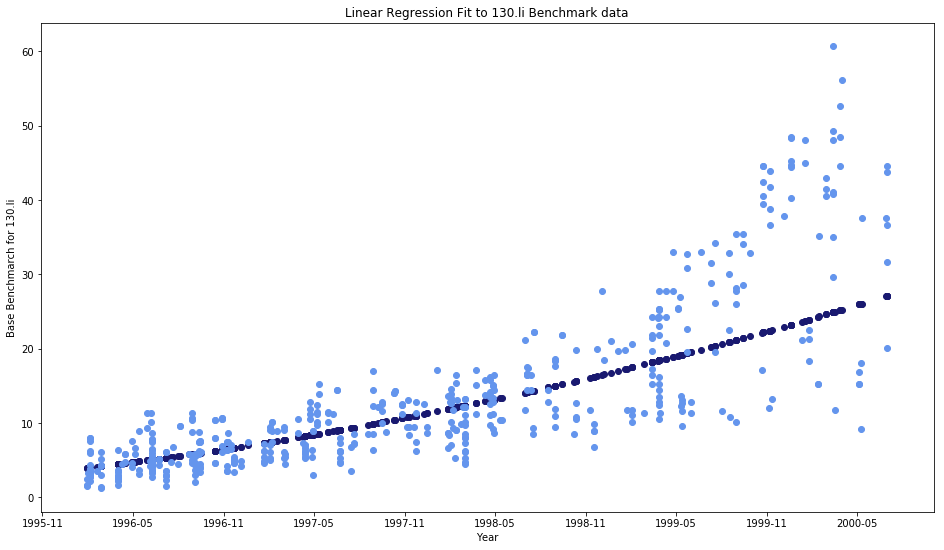

In [137]:
#train a linear regression
linmodel = linear_model.LinearRegression()
points = linmodel.fit(ldates.reshape(494,1), linbase)

preds = (points.predict(ldates.reshape(494,1)))**2

plt.figure(figsize = (16,9))
plt.scatter(lindate, preds, color = 'midnightblue')
plt.scatter(lindate,sbms2.base, color = 'cornflowerblue')
plt.title("Linear Regression Fit to 130.li Benchmark data")
plt.xlabel("Year")
plt.ylabel("Base Benchmarch for 130.li")
plt.show()

In this case we see that Moore's law is not upheld, as we would expect the increase in base speed from 1996 to 2000 to be 16 fold, however we only see an increase of around 6 fold when looking at the regression model. 

### MNIST

In [8]:
#load datasets
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import *
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
    
digits = load_digits()

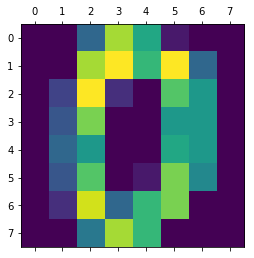

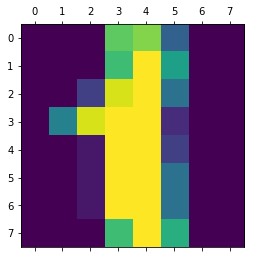

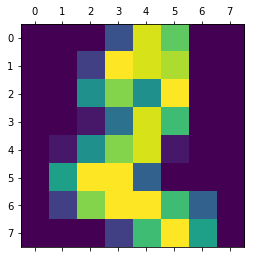

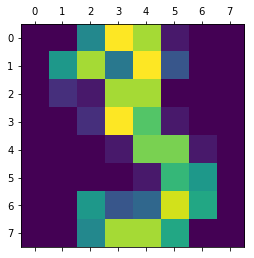

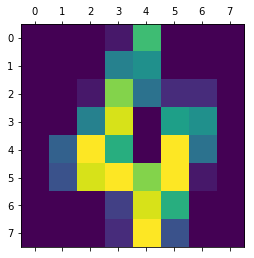

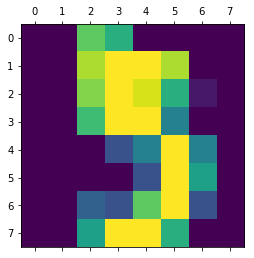

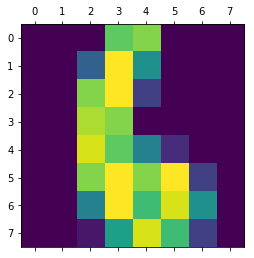

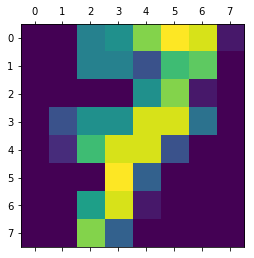

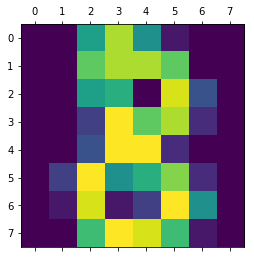

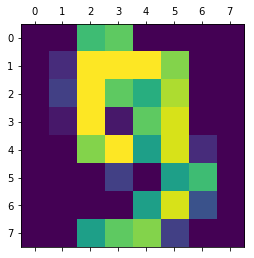

<Figure size 432x288 with 0 Axes>

In [141]:
#Plot some examples
for i in range(10):
    plt.matshow(digits.images[i])
plt.figure()
plt.show()

In [11]:
#trimming the data to the two number we want to test
fours = digits.target == 4; nines = digits.target == 9; numbs = fours + nines
newdata = []
newtarget = []
for i in range(len(numbs)):
    if numbs[i] == True:
        newdata.append(np.array(digits.data[i]))
        newtarget.append(digits.target[i])

In [143]:
#train a model to distinguish between 4 and 9

#split data into training and testing datasets
trainData, testData, trainLabels, testLabels = model_selection.train_test_split(newdata, 
                                                                newtarget, test_size=0.3, random_state=46)
#split training data to include a validation set
trainData, valData, trainLabels, valLabels = model_selection.train_test_split(trainData, 
                                                              trainLabels, test_size=0.1, random_state=82)


print("training data points: {}".format(len(trainLabels)))
print("validation data points: {}".format(len(valLabels)))
print("testing data points: {}".format(len(testLabels)))


acc = [0,0]
kVals = range(1, 20)

# find a good fit for k using validation set
for k in range(1,20):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(trainData, trainLabels)
    
    score = model.score(valData, valLabels)
    if score > acc[0]:
        acc[0] = score
        acc[1] = k
    
i = acc[1]
print("optimal value for k: {}".format(kVals[i]))

model = KNeighborsClassifier(n_neighbors=kVals[i])
model.fit(trainData, trainLabels)
predictions = model.predict(testData)
 
# Use the classification report to evaluate the model
print("Test Results")
print(classification_report(testLabels, predictions))



training data points: 226
validation data points: 26
testing data points: 109
optimal value for k: 2
Test Results
              precision    recall  f1-score   support

           4       0.98      1.00      0.99        54
           9       1.00      0.98      0.99        55

   micro avg       0.99      0.99      0.99       109
   macro avg       0.99      0.99      0.99       109
weighted avg       0.99      0.99      0.99       109



Here we can see that the model best distinguishes between the digits 9 and 4 when using the nearest 2 neighbors.

In [145]:
#training a similar model, however using all of the digits

trainData1, testData1, trainLabels1, testLabels1 = model_selection.train_test_split(np.array(digits.data), 
                                                                digits.target, test_size=0.3, random_state=46)
trainData1, valData1, trainLabels1, valLabels1 = model_selection.train_test_split(trainData1, 
                                                              trainLabels1, test_size=0.1, random_state=82)


print("training data points: {}".format(len(trainLabels1)))
print("validation data points: {}".format(len(valLabels1)))
print("testing data points: {}".format(len(testLabels1)))


accuracies1 = []
acc = [0,0]
kVals1 = range(1, 15)


for k in range(1,50):
    model1 = KNeighborsClassifier(n_neighbors=k)
    model1.fit(trainData1, trainLabels1)
    
    score1 = model1.score(valData1, valLabels1)
    if score > acc[0]:
        acc[0] = score1
        acc[1] = k    

    
i = acc[1]
print("optimal value for k: {}".format(kVals[i]))

model1 = KNeighborsClassifier(n_neighbors=kVals1[i])
model1.fit(trainData1, trainLabels1)
predictions1 = model1.predict(testData1)

print("Test Results")
print(classification_report(testLabels1, predictions1))


training data points: 1131
validation data points: 126
testing data points: 540
optimal value for k: 2
Test Results
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       0.95      1.00      0.98        61
           2       1.00      1.00      1.00        66
           3       0.95      0.98      0.96        54
           4       0.98      1.00      0.99        48
           5       0.97      0.98      0.97        57
           6       0.98      1.00      0.99        44
           7       0.98      1.00      0.99        60
           8       1.00      0.94      0.97        48
           9       1.00      0.91      0.95        64

   micro avg       0.98      0.98      0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



When distinguishing between all of the numbers, 2 nearest neighbors is also sufficient.